In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Task 10

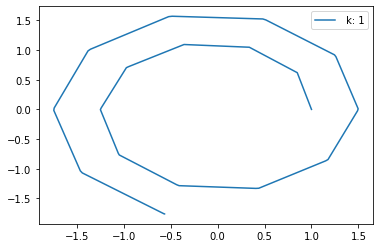

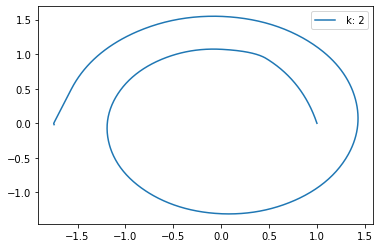

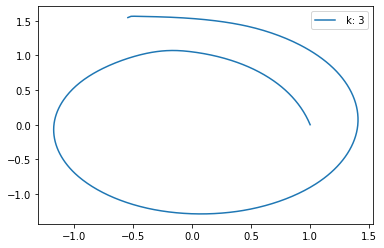

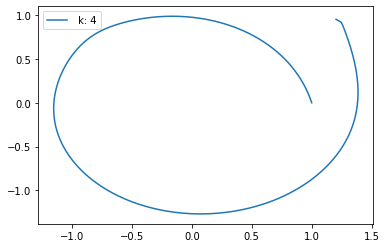

In [2]:
def de_Boor(x, t, p, k):

    """
    x ... Position
    t ... Stützstellen
    p ... Kontrollpunkte
    k ... B-Spline Grad
    """

    m = -1
    for i in range(len(t)-k-1):
        if t[i] <= x:
            m = i
    if m<0:
        raise ValueError("x={0} not in internal [{1},{2}]".format(x, t[0], t[-1]))

    c = [p[j + m - k] for j in range(0, k+1)]
    d = np.copy(c)

    for r in range(1, k+1):
        for j in range(k, r-1, -1):
            alpha = (x - t[j+m-k]) / (t[j+1+m-r] - t[j+m-k] + 2**(-10))
            d[j] = (1.0 - alpha) * d[j-1] + alpha * d[j]

    return d[k]

def gamma(t):
    return [(t + 1) * np.cos(4 * np.pi * t), (t + 1) * np.sin(4 * np.pi * t)]

xs = np.linspace(0, 1,1000)

n = 20

p = [gamma(i / n) for i in range(0, n + 1)]

for k in [1, 2, 3, 4]:
    y0 = []
    y1 = []

    t = np.linspace(0, 1, n + 1)
    t[0:k+1] = 0
    t[n-k:n] = n

    for x in xs:
        y = de_Boor(x, t, p, k)
        y0.append(y[0])
        y1.append(y[1])

    plt.plot(y0, y1, label = " k: " + str(k))
    plt.legend()
    plt.show()


Reference solution using  scipy.interpolate.splev

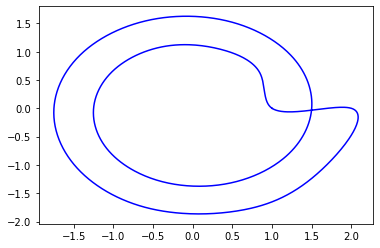

In [3]:
p_0 = []
p_1 = []
for pi in p:
    p_0.append(pi[0])
    p_1.append(pi[1])

# append the starting x,y coordinates
p_0 = np.r_[p_0, p_0[0]]
p_1 = np.r_[p_1, p_1[0]]

tck, u = interpolate.splprep([p_0, p_1], s=0, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(xi, yi, '-b')

plt.show()
